In [1]:
import numpy as np
import pandas as pd
import root_pandas as rp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ROOT
import new_analysis
import array
import matplotlib
matplotlib.rcParams['text.usetex'] = False

Welcome to JupyROOT 6.18/04


/Users/vahsengrouplaptop/workspace/jeff_workspace/analysis/phase3/new_analysis.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means[col]=0 #will be deleted at the end. Used so we can append rows of means
/Users/vahsengrouplaptop/workspace/jeff_workspace/analysis/phase3/new_analysis.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errs[col] = 0


In [2]:
a = new_analysis.analysis()

In [3]:
LER_cont_inj = a.get_tpc_data_during_study_period("LER", "Cont_inj")
LER_decay = a.get_tpc_data_during_study_period("LER", "Decay")
HER_cont_inj = a.get_tpc_data_during_study_period("HER", "Cont_inj")
HER_decay = a.get_tpc_data_during_study_period("HER", "Decay")
Lumi_cont_inj = a.get_tpc_data_during_study_period("Lumi", "Cont_inj")
Lumi_decay = a.get_tpc_data_during_study_period("Lumi", "Decay")

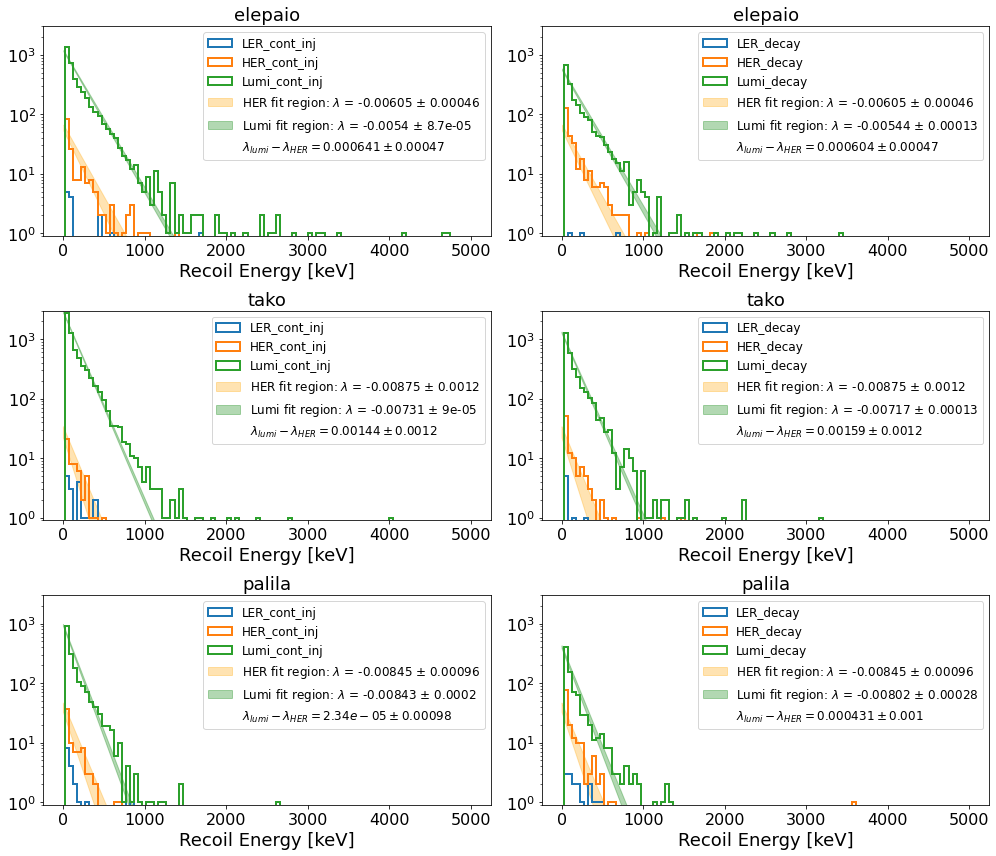

 FCN=16.5945 FROM MIGRAD    STATUS=CONVERGED     136 CALLS         137 TOTAL
                     EDM=5.23959e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.59301e+00   1.05730e+00   2.04765e-03  -2.83403e-05
   2  p1          -3.71331e-03   1.02979e-03   1.52793e-04   4.11846e-04
                               ERR DEF= 0.5
 FCN=39.665 FROM MIGRAD    STATUS=CONVERGED     162 CALLS         163 TOTAL
                     EDM=4.46881e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.00229e+01   6.83466e+00   1.97953e-02  -4.61499e-05
   2  p1          -6.04550e-03   4.57255e-04   8.12885e-05   9.60411e-03
                               ERR DEF= 0.5
 FCN=342.359 FROM M

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info i

In [4]:
def plot_spectra(side = "BWD", ekey = 'full_corrected_energy'):
    if side == "BWD":
        tpcs = ['elepaio', 'tako', 'palila']
        ring = "HER"
    else:
        tpcs = ['iiwi', 'nene', 'humu']
        ring = "LER"
    i = 1
    fig = plt.figure(figsize=(14,12))
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=18)
    for tpc in tpcs:
        x_plt = np.linspace(0,5000,5001)
        plt.subplot(3,2,i)
        plt.hist(LER_cont_inj[tpc][ekey], bins = 100, histtype = 'step', range = (20,5000), label = 'LER_cont_inj', linewidth = 2)
        params_LER, errs_LER = get_fit_function(LER_cont_inj[tpc], ekey)
        if params_LER[0] < 10:
            pass
        else:
            plt.fill_between(x_plt, (params_LER[0]-errs_LER[0])*np.exp((params_LER[1]-errs_LER[1])*x_plt), (params_LER[0]+errs_LER[0])*np.exp((params_LER[1]+errs_LER[1])*x_plt), color = 'blue', label = r'LER fit region: $\lambda$ = %s $\pm$ %s'%(float('%.3g' % params_LER[1]), float('%.2g' % errs_LER[1])), alpha = 0.3)
        plt.hist(HER_cont_inj[tpc][ekey], bins = 100, histtype = 'step', range = (20,5000), label = 'HER_cont_inj', linewidth = 2)
        params, errs = get_fit_function(HER_cont_inj[tpc], ekey)
        if params[0] < 10:
            pass
        else:
            plt.fill_between(x_plt, (params[0]-errs[0])*np.exp((params[1]-errs[1])*x_plt), (params[0]+errs[0])*np.exp((params[1]+errs[1])*x_plt), color = 'orange', label = r'HER fit region: $\lambda$ = %s $\pm$ %s'%(float('%.3g' % params[1]), float('%.2g' % errs[1])), alpha = 0.3)
        plt.hist(Lumi_cont_inj[tpc][ekey], bins = 100, histtype = 'step', range = (20,5000), label = 'Lumi_cont_inj', linewidth = 2)
        params_lumi, errs_lumi = get_fit_function(Lumi_cont_inj[tpc], ekey)
        plt.fill_between(x_plt, (params_lumi[0]-errs_lumi[0])*np.exp((params_lumi[1]-errs_lumi[1])*x_plt), (params_lumi[0]+errs_lumi[0])*np.exp((params_lumi[1]+errs_lumi[1])*x_plt), color = 'green', label = r'Lumi fit region: $\lambda$ = %s $\pm$ %s'%(float('%.3g' % params_lumi[1]), float('%.2g' % errs_lumi[1])), alpha = 0.3)
        if side == "BWD":
            plt.fill_between([0],[0],[0], lw = 0, label = r'$\lambda_{lumi}-\lambda_{%s} = %s \pm %s$'%(ring, float('%.3g' % (params_lumi[1]-params[1])), float('%.2g' % np.sqrt(errs_lumi[1]**2+errs[1]**2))), color = 'white')
        else:
            plt.fill_between([0],[0],[0], lw = 0, label = r'$\lambda_{lumi}-\lambda_{%s} = %s \pm %s$'%(ring, float('%.3g' % (params_lumi[1]-params_LER[1])), float('%.2g' % np.sqrt(errs_lumi[1]**2+errs_LER[1]**2))), color = 'white')
        plt.title(tpc)
        plt.yscale("Log")
        plt.xlabel('Recoil Energy [keV]')
        plt.ylim(0.9,3000)
        plt.legend()
        plt.subplot(3,2,i+1)
        plt.hist(LER_decay[tpc][ekey], bins = 100, histtype = 'step', range = (20,5000), label = 'LER_decay', linewidth = 2)
        params_LER, errs_LER = get_fit_function(LER_cont_inj[tpc], ekey)
        if params_LER[0] < 10:
            pass
        else:
            plt.fill_between(x_plt, (params_LER[0]-errs_LER[0])*np.exp((params_LER[1]-errs_LER[1])*x_plt), (params_LER[0]+errs_LER[0])*np.exp((params_LER[1]+errs_LER[1])*x_plt), color = 'blue', label = r'LER fit region: $\lambda$ = %s $\pm$ %s'%(float('%.3g' % params_LER[1]), float('%.2g' % errs_LER[1])), alpha = 0.3)
        plt.hist(HER_decay[tpc][ekey], bins = 100, histtype = 'step', range = (20,5000), label = 'HER_decay', linewidth = 2)
        params, errs = get_fit_function(HER_cont_inj[tpc], ekey)
        if params[0] < 10:
            pass
        else:
            plt.fill_between(x_plt, (params[0]-errs[0])*np.exp((params[1]-errs[1])*x_plt), (params[0]+errs[0])*np.exp((params[1]+errs[1])*x_plt), color = 'orange', label = r'HER fit region: $\lambda$ = %s $\pm$ %s'%(float('%.3g' % params[1]), float('%.2g' % errs[1])), alpha = 0.3)
        plt.hist(Lumi_decay[tpc][ekey], bins = 100, histtype = 'step', range = (20,5000), label = 'Lumi_decay', linewidth = 2)
        params_lumi, errs_lumi = get_fit_function(Lumi_decay[tpc], ekey)
        plt.fill_between(x_plt, (params_lumi[0]-errs_lumi[0])*np.exp((params_lumi[1]-errs_lumi[1])*x_plt), (params_lumi[0]+errs_lumi[0])*np.exp((params_lumi[1]+errs_lumi[1])*x_plt), color = 'green', label = r'Lumi fit region: $\lambda$ = %s $\pm$ %s'%(float('%.3g' % params_lumi[1]), float('%.2g' % errs_lumi[1])), alpha = 0.3)
        if side == "BWD":
            plt.fill_between([0],[0],[0], lw = 0, label = r'$\lambda_{lumi}-\lambda_{%s} = %s \pm %s$'%(ring, float('%.3g' % (params_lumi[1]-params[1])), float('%.2g' % np.sqrt(errs_lumi[1]**2+errs[1]**2))), color = 'white')
        else:
            plt.fill_between([0],[0],[0], lw = 0, label = r'$\lambda_{lumi}-\lambda_{%s} = %s \pm %s$'%(ring, float('%.3g' % (params_lumi[1]-params_LER[1])), float('%.2g' % np.sqrt(errs_lumi[1]**2+errs_LER[1]**2))), color = 'white')
        plt.title(tpc)
        plt.yscale("Log")
        plt.xlabel('Recoil Energy [keV]')
        plt.ylim(0.9,3000)
        plt.legend()
        i+=2
    plt.tight_layout()
    plt.show()
def get_fit_function(df, ekey):
    h = ROOT.TH1D("h", "", 100, 20, 5000)
    energy = array.array('d', df[ekey])
    for i in range(0,len(df)):
        h.Fill(energy[i])
    f = ROOT.TF1("f","[0]*TMath::Exp(([1]*x))")
    #f.SetParLimits(0,0,20)
    #f.SetParLimits(2,0,0.001)
    f.SetParLimits(1,-0.05,0)
    h.Fit(f, "SL")
    c = ROOT.TCanvas("c1", "c1", 800, 600)
    params = f.GetParameters()
    par_errs = f.GetParErrors()
    return params, par_errs
plot_spectra()
#params, errs = get_fit_function(Lumi_cont_inj['elepaio'])

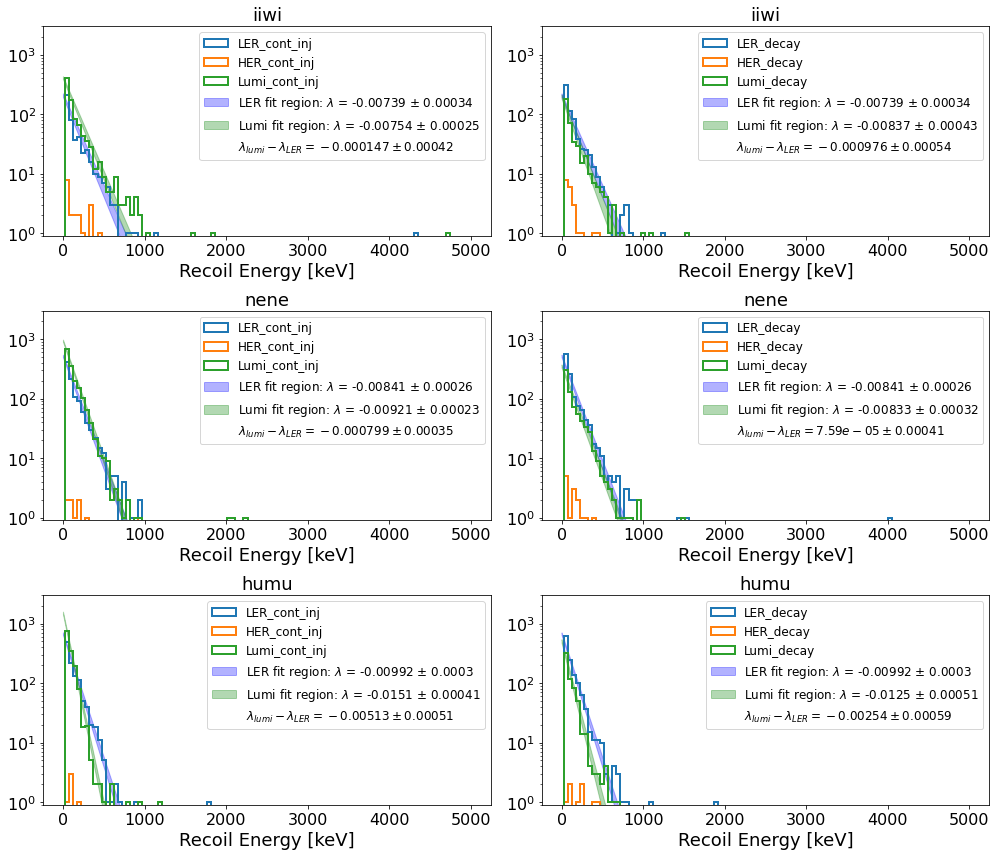

 FCN=61.713 FROM MIGRAD    STATUS=CONVERGED     168 CALLS         169 TOTAL
                     EDM=2.26323e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.05644e+02   1.44287e+01   5.11649e-02   1.06657e-05
   2  p1          -7.39392e-03   3.39670e-04   6.78862e-05  -3.04017e-02
                               ERR DEF= 0.5
 FCN=5.98275 FROM MIGRAD    STATUS=CONVERGED     162 CALLS         163 TOTAL
                     EDM=1.46582e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.28500e+00   2.92366e+00   3.33939e-03  -2.44289e-05
   2  p1          -7.49387e-03   1.72700e-03   1.10754e-04   5.93761e-04
                               ERR DEF= 0.5
 FCN=104.985 FROM M

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info i

In [5]:
plot_spectra("FWD")

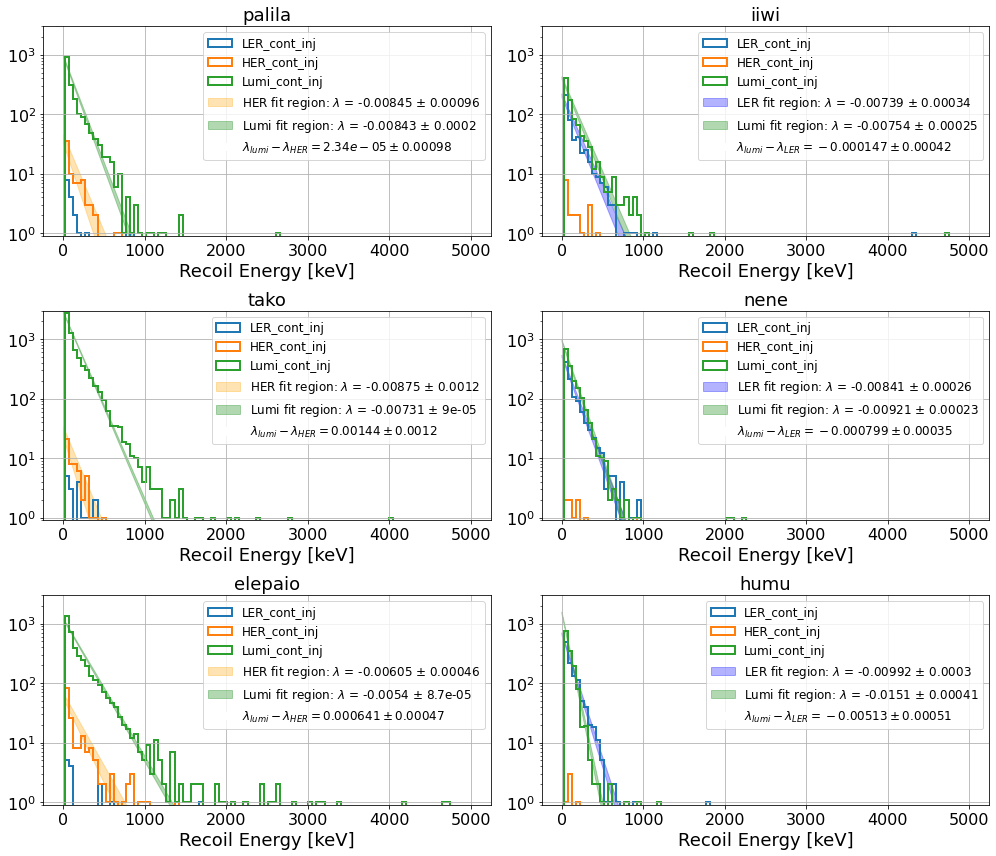

 FCN=167.331 FROM MINOS     STATUS=SUCCESSFUL     31 CALLS         259 TOTAL
                     EDM=4.60574e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.34519e+02   3.36493e+01   2.08780e-01  -1.30767e-06
   2  p1          -8.42967e-03   1.96518e-04   1.96518e-04   1.26835e-03
                               ERR DEF= 0.5
 FCN=10.1179 FROM MINOS     STATUS=SUCCESSFUL     37 CALLS         378 TOTAL
                     EDM=7.14255e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.91700e+01   6.90217e+00   2.13104e-01  -1.01438e-04
   2  p1          -8.45311e-03   9.63753e-04   9.63753e-04   2.21067e-03
                               ERR DEF= 0.5
 FCN=104.985 FROM 

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info i

In [21]:
def plot_spectra_all(ekey = 'full_corrected_energy'):
    tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
    i = 1
    fig = plt.figure(figsize=(14,12))
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=18)
    for tpc in tpcs:
        x_plt = np.linspace(0,5000,5001)
        plt.subplot(3,2,i)
        plt.hist(LER_cont_inj[tpc][ekey], bins = 100, histtype = 'step', range = (20,5000), label = 'LER_cont_inj', linewidth = 2)
        plt.hist(HER_cont_inj[tpc][ekey], bins = 100, histtype = 'step', range = (20,5000), label = 'HER_cont_inj', linewidth = 2)
        plt.hist(Lumi_cont_inj[tpc][ekey], bins = 100, histtype = 'step', range = (20,5000), label = 'Lumi_cont_inj', linewidth = 2)
        params_lumi, errs_lumi = get_fit_function(Lumi_cont_inj[tpc], ekey)
        if i%2 != 0:
            params, errs = get_fit_function(HER_cont_inj[tpc], ekey)
            if params[0] < 10:
                pass
            else:
                plt.fill_between(x_plt, (params[0]-errs[0])*np.exp((params[1]-errs[1])*x_plt), (params[0]+errs[0])*np.exp((params[1]+errs[1])*x_plt), color = 'orange', label = r'HER fit region: $\lambda$ = %s $\pm$ %s'%(float('%.3g' % params[1]), float('%.2g' % errs[1])), alpha = 0.3)
        else:
            params, errs = get_fit_function(LER_cont_inj[tpc], ekey)
            if params[0] < 10:
                pass
            else:
                plt.fill_between(x_plt, (params[0]-errs[0])*np.exp((params[1]-errs[1])*x_plt), (params[0]+errs[0])*np.exp((params[1]+errs[1])*x_plt), color = 'blue', label = r'LER fit region: $\lambda$ = %s $\pm$ %s'%(float('%.3g' % params[1]), float('%.2g' % errs[1])), alpha = 0.3)
        
        
        plt.fill_between(x_plt, (params_lumi[0]-errs_lumi[0])*np.exp((params_lumi[1]-errs_lumi[1])*x_plt), (params_lumi[0]+errs_lumi[0])*np.exp((params_lumi[1]+errs_lumi[1])*x_plt), color = 'green', label = r'Lumi fit region: $\lambda$ = %s $\pm$ %s'%(float('%.3g' % params_lumi[1]), float('%.2g' % errs_lumi[1])), alpha = 0.3)
        if i%2 != 0:
            plt.fill_between([0],[0],[0], lw = 0, label = r'$\lambda_{lumi}-\lambda_{HER} = %s \pm %s$'%(float('%.3g' % (params_lumi[1]-params[1])), float('%.2g' % np.sqrt(errs_lumi[1]**2+errs[1]**2))), color = 'white')
        else:
            plt.fill_between([0],[0],[0], lw = 0, label = r'$\lambda_{lumi}-\lambda_{LER} = %s \pm %s$'%(float('%.3g' % (params_lumi[1]-params[1])), float('%.2g' % np.sqrt(errs_lumi[1]**2+errs[1]**2))), color = 'white')
        plt.title(tpc)
        plt.yscale("Log")
        plt.xlabel('Recoil Energy [keV]')
        plt.ylim(0.9,3000)
        plt.grid()
        plt.legend()
        i += 1
    plt.tight_layout()
    plt.savefig("energy_spectra.png")
    plt.show()
def get_fit_function(df, ekey):
    h = ROOT.TH1D("h", "", 100, 20, 5000)
    energy = array.array('d', df[ekey])
    for i in range(0,len(df)):
        h.Fill(energy[i])
    f = ROOT.TF1("f","[0]*TMath::Exp(([1]*x))")
    #f.SetParLimits(0,0,20)
    #f.SetParLimits(2,0,0.001)
    f.SetParLimits(1,-0.05,0)
    h.Fit(f, "SLEM")
    c = ROOT.TCanvas("c1", "c1", 800, 600)
    params = f.GetParameters()
    par_errs = f.GetParErrors()
    return params, par_errs
plot_spectra_all()
#params, errs = get_fit_function(Lumi_cont_inj['elepaio'])

In [ ]:
def plot_He_vs_CO_spectra(side = "BWD"):
    if side == "BWD":
        tpcs = ['tako', 'palila', 'elepaio']
    else:
        tpcs = ['iiwi', 'nene', 'humu']
    i = 1
    fig = plt.figure(figsize=(10,10))
    Single_beam_cont_inj = {}
    Single_beam_decay = {}
    Single_beam_total = {}
    Single_beam_He = {}
    Single_beam_CO = {}
    Lumi_total = {}
    Lumi_He = {}
    Lumi_CO = {}
    for tpc in tpcs:
        plt.subplot(3,1,i)
        Single_beam_cont_inj[tpc] = LER_cont_inj[tpc].append(HER_cont_inj[tpc])
        Single_beam_decay[tpc] = LER_decay[tpc].append(HER_decay[tpc])
        Single_beam_total[tpc] = Single_beam_cont_inj[tpc].append(Single_beam_decay[tpc])
        Lumi_total[tpc] = Lumi_cont_inj[tpc].append(Lumi_decay[tpc])
        Lumi_He[tpc] = Lumi_total[tpc].loc[Lumi_total[tpc]['He_recoil']==1]
        Lumi_CO[tpc] = Lumi_total[tpc].loc[Lumi_total[tpc]['He_recoil']==0]
        Single_beam_He[tpc] = Single_beam_total[tpc].loc[Single_beam_total[tpc]['He_recoil']==1]
        Single_beam_CO[tpc] = Single_beam_total[tpc].loc[Single_beam_total[tpc]['He_recoil']==0]
        plt.hist(Single_beam_He[tpc]['full_corrected_energy'], bins = 100, histtype = 'step', range = (20,5000), label = 'Single beam He recoils', linewidth = 2)
        plt.hist(Single_beam_CO[tpc]['full_corrected_energy'], bins = 100, histtype = 'step', range = (20,5000), label = 'Single beam C/O recoils', linewidth = 2)
        plt.hist(Lumi_He[tpc]['full_corrected_energy'], bins = 100, histtype = 'step', range = (20,5000), label = 'Lumi He recoils', linewidth = 2)
        plt.hist(Lumi_CO[tpc]['full_corrected_energy'], bins = 100, histtype = 'step', range = (20,5000), label = 'Lumi C/O recoils', linewidth = 2)
        plt.title(tpc)
        plt.yscale("Log")
        plt.xlabel('Recoil Energy [keV]')
        plt.ylim(0.9,5000)
        plt.legend()
        i+=1
    plt.tight_layout()
    plt.show()
plot_He_vs_CO_spectra()

In [ ]:
plot_He_vs_CO_spectra(side = 'FWD')

### Redefine head-tail before doing angular analysis and transform TPC coordinate systems to Belle Frame

Transformations are below and important!

In [87]:
### Define x, y, and z in the Belle Frame
for tpc in ['humu', 'nene', 'tako', 'elepaio', 'iiwi', 'palila']:
    for df in [Lumi_decay[tpc],Lumi_cont_inj[tpc], LER_decay[tpc],LER_cont_inj[tpc], HER_decay[tpc],HER_cont_inj[tpc]]:
        if tpc == 'nene':
            zscale = 1401.1e4
        if tpc == 'humu':
            zscale = 1601.1e4
        if tpc == 'tako':
            zscale = -798.8e4
        if tpc == 'elepaio':
            zscale = -1398.8e4
        if tpc == 'iiwi':
            zscale = 655.3e4
        if tpc == 'palila':
            zscale = -563.7e4
        if (tpc == 'humu') or (tpc == 'nene'):
            df['x_belle'] = (-df['y']+1.68e4) + 201e4
            df['y_belle'] = (df['x']+16e4)
            df['z_belle'] = df['z']+zscale
        elif (tpc == 'tako') or (tpc == 'elepaio'):
            df['x_belle'] = (-df['y']+1.68e4) + 204e4
            df['y_belle'] = (df['x']+16e4)
            df['z_belle'] = df['z']+zscale
        elif tpc == 'iiwi':
            df['x_belle'] = -182.9e4 + df['y']
            df['y_belle'] = df['x'] + 16e4
            df['z_belle'] = zscale - df['z']
        else:
            df['x_belle'] = -181.4e4 + df['y']
            df['y_belle'] = df['x'] + 16e4
            df['z_belle'] = zscale + df['z']
        

In [92]:
from ROOT import TVector3
def fit_track(df, i): #faster than root fit, so this is standard
    x = df['x_belle'].iloc[i]
    y = df['y_belle'].iloc[i]
    z = df['z_belle'].iloc[i]
    data = np.concatenate((x[:, np.newaxis], y[:, np.newaxis], z[:, np.newaxis]), axis=1)
    datamean = data.mean(axis = 0)
    uu, dd, vv = np.linalg.svd(data-datamean)
    xhat = TVector3(vv[0][0],vv[0][1],vv[0][2])
    zhat = TVector3(0,0,1)
    yhat = zhat.Cross(xhat).Unit()
    zhat_track = xhat.Cross(yhat).Unit()
    zhat = np.array([zhat.x(), zhat.y(), zhat.z()])
    yhat = np.array([yhat.x(), yhat.y(), yhat.z()])
    x_rel = x-x.mean()
    y_rel = y-y.mean()
    z_rel = z-z.mean()
    x_track = np.dot([[x_rel[i],y_rel[i],z_rel[i]] for i in range(0,len(x))],[vv[0][0],vv[0][1],vv[0][2]])
    y_track = np.dot([[x_rel[i],y_rel[i],z_rel[i]] for i in range(0,len(y))],yhat)
    z_track = np.dot([[x_rel[i],y_rel[i],z_rel[i]] for i in range(0,len(z))],zhat)
    length = (x_track.max() - x_track.min())
    width = (y_track.max() - y_track.min())
    projection= []
    for point in data:
        projection += [np.dot(point, vv[0])]
    #projection = x_track
    maxp = max(projection)
    minp = min(projection)
    midp = 0.5*float(maxp+minp)
    head_charge = 0
    tail_charge = 0
    head_q = 0
    tail_q = 0
    phi_no_headtail = xhat.Phi()*180/np.pi
    for p in projection:
        if p > midp:
            head_charge += 1
            head_q += 1
        else:
            tail_charge += 1
            tail_q += 1
    if head_charge > tail_charge:
        xhat = -1. * xhat
    head_charge_fraction = head_charge/(head_charge+tail_charge)
    tail_charge_fraction = 1 - head_charge_fraction
    theta = xhat.Theta()*180/np.pi
    phi = xhat.Phi()*180/np.pi
    return theta, phi, phi_no_headtail, head_charge_fraction, tail_charge_fraction
tpcs = Lumi_decay.keys()

for tpc in ['humu','nene', 'tako', 'elepaio', 'iiwi', 'palila']:
    for df in [Lumi_decay[tpc],Lumi_cont_inj[tpc], LER_decay[tpc],LER_cont_inj[tpc], HER_decay[tpc],HER_cont_inj[tpc]]:
        theta_belle = []
        phi_belle = []
        phi_before_headtail_belle = []
        hq = []
        tq = []
        for i in range(0,len(df)):
            theta_b, phi_b, phi_b_no_ht, headq, tailq = fit_track(df, i)
            theta_belle.append(theta_b)
            phi_belle.append(phi_b)
            phi_before_headtail_belle.append(phi_b_no_ht)
            hq.append(headq)
            tq.append(tailq)
        df['theta_belle'] = theta_belle
        df['phi_belle'] = phi_belle
        df['phi_belle_no_headtail'] = phi_before_headtail_belle
        df['head_charge_original'] = hq
        df['tail_charge_original'] = tq


(14012     37.018940
 14013    289.365029
 14014     10.590477
 14015     14.703873
 14016     17.073795
             ...    
 21246    232.673742
 21247    189.536452
 21248    126.395698
 21249    142.575367
 21250    114.669087
 Name: phi, Length: 7239, dtype: float64, 14012    -52.981060
 14013   -160.634971
 14014    -79.409523
 14015    -75.296127
 14016    -72.926205
             ...    
 21246    142.673742
 21247     99.536452
 21248     36.395698
 21249     52.575367
 21250     24.669087
 Name: phi_belle, Length: 7239, dtype: float64)

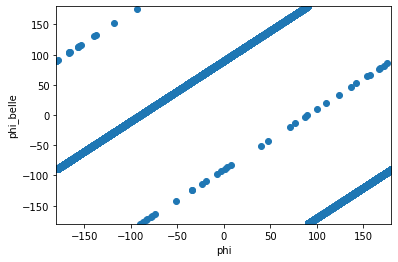

In [102]:
plt.plot(Lumi_cont_inj['tako']['phi'], Lumi_cont_inj['tako']['phi_belle'], 'o')
plt.xlabel('phi')
plt.ylabel('phi_belle')
plt.ylim(-180,180)
plt.xlim(-180,180)
Lumi_cont_inj['tako']['phi']+180, Lumi_cont_inj['tako']['phi_belle']

In [ ]:
def plot_angular_dist(side = "BWD"):
    if side == "BWD":
        tpcs = ['tako', 'palila', 'elepaio']
    else:
        tpcs = ['iiwi', 'nene', 'humu']
    i = 1
    fig = plt.figure(figsize=(20,15))
    for tpc in tpcs:
        plt.subplot(3,2,i)
        plt.hist(LER_cont_inj[tpc]['theta'], bins = 60, histtype = 'step', range = (0,180), label = 'LER_cont_inj', linewidth = 2)
        plt.hist(HER_cont_inj[tpc]['theta'], bins = 60, histtype = 'step', range = (0,180), label = 'HER_cont_inj', linewidth = 2)
        plt.hist(Lumi_cont_inj[tpc]['theta'], bins = 60, histtype = 'step', range = (0,180), label = 'Lumi_cont_inj', linewidth = 2)
        plt.title(tpc)
        #plt.yscale("Log")
        plt.xlabel('cos(theta)')
        #plt.ylim(0,350)
        plt.legend(loc = 'upper left')
        plt.subplot(3,2,i+1)
        plt.hist(LER_decay[tpc]['theta'], bins = 60, histtype = 'step', range = (0,180), label = 'LER_decay', linewidth = 2)
        plt.hist(HER_decay[tpc]['theta'], bins = 60, histtype = 'step', range = (0,180), label = 'HER_decay', linewidth = 2)
        plt.hist(Lumi_decay[tpc]['theta'], bins = 60, histtype = 'step', range = (0,180), label = 'Lumi_decay', linewidth = 2)
        plt.title(tpc)
        #plt.yscale("Log")
        plt.xlabel('Track theta [degrees]')
        #plt.ylim(0,350)
        plt.legend(loc = 'upper left')
        i+=2
    plt.tight_layout()
    plt.show()
plot_angular_dist("BWD")

In [ ]:
plot_angular_dist("FWD")

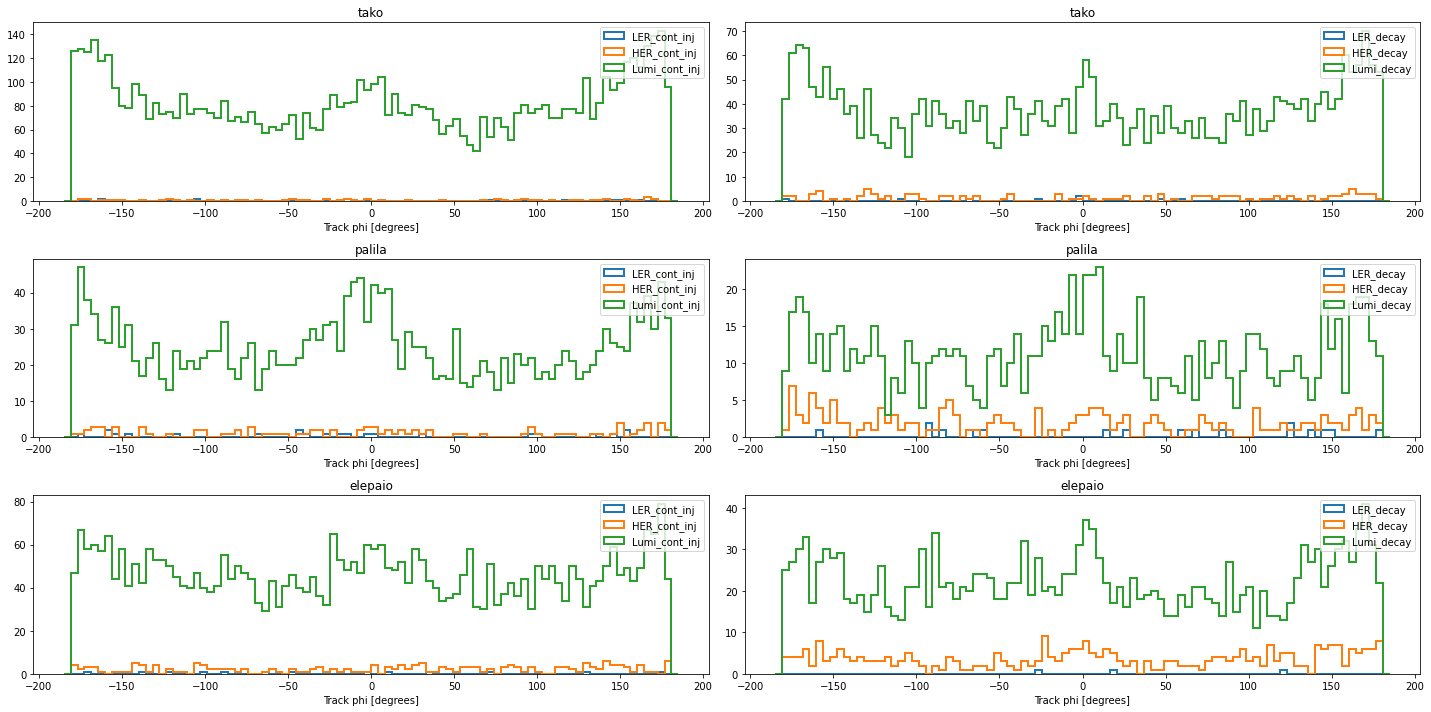

In [103]:
def plot_phi_dist(side = "BWD"):
    if side == "BWD":
        tpcs = ['tako', 'palila', 'elepaio']
    else:
        tpcs = ['iiwi', 'nene', 'humu']
    i = 1
    fig = plt.figure(figsize=(20,10))
    for tpc in tpcs:
        plt.subplot(3,2,i)
        plt.hist(LER_cont_inj[tpc]['phi'], bins = 90, histtype = 'step', range = (-185,185), label = 'LER_cont_inj', linewidth = 2)
        plt.hist(HER_cont_inj[tpc]['phi'], bins = 90, histtype = 'step', range = (-185,185), label = 'HER_cont_inj', linewidth = 2)
        plt.hist(Lumi_cont_inj[tpc]['phi'], bins = 90, histtype = 'step', range = (-185,185), label = 'Lumi_cont_inj', linewidth = 2)
        plt.title(tpc)
        #plt.yscale("Log")
        plt.xlabel('Track phi [degrees]')
        #plt.ylim(0.9,3000)
        plt.legend()
        plt.subplot(3,2,i+1)
        plt.hist(LER_decay[tpc]['phi'], bins = 90, histtype = 'step', range = (-185,185), label = 'LER_decay', linewidth = 2)
        plt.hist(HER_decay[tpc]['phi'], bins = 90, histtype = 'step', range = (-185,185), label = 'HER_decay', linewidth = 2)
        plt.hist(Lumi_decay[tpc]['phi'], bins = 90, histtype = 'step', range = (-185,185), label = 'Lumi_decay', linewidth = 2)
        plt.title(tpc)
        #plt.yscale("Log")
        plt.xlabel('Track phi [degrees]')
        #plt.ylim(0.9,3000)
        plt.legend()
        i+=2
    plt.tight_layout()
    plt.show()
plot_phi_dist()

In [ ]:
plot_phi_dist("FWD")

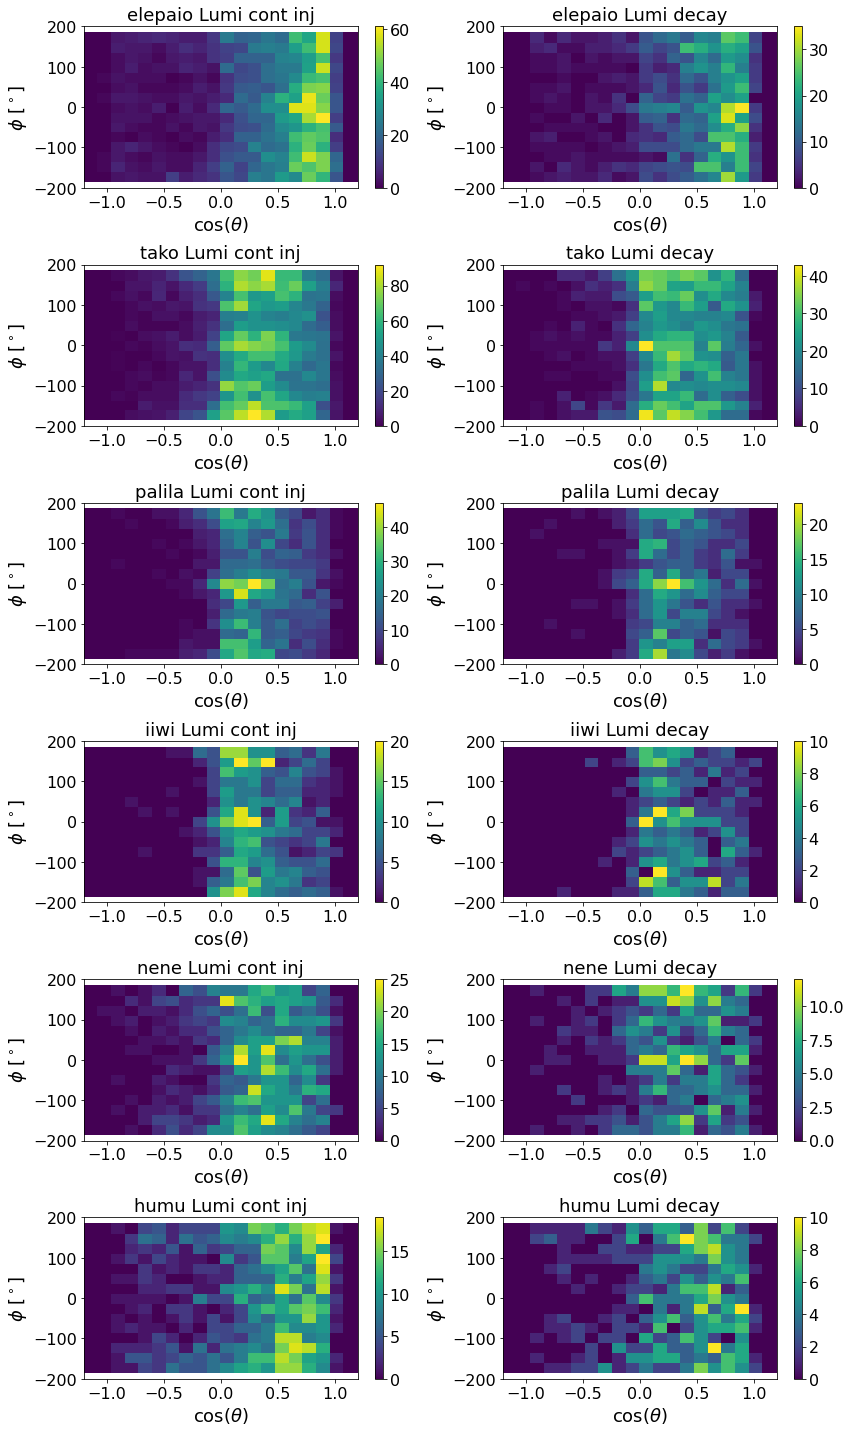

In [118]:
import matplotlib
def plot_theta_phi():
    tpcs = ['elepaio', 'tako', 'palila','iiwi', 'nene', 'humu']
    i = 1
    fig = plt.figure(figsize=(12,20))
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=18)
    for tpc in tpcs:
        #plt.subplot(6,3,i)
        #plt.hist2d(np.cos(LER_cont_inj[tpc]['theta']*np.pi/180), LER_cont_inj[tpc]['phi'], bins = (20,15), range = ((-1.2,1.2), (-185,185)), label = 'LER_cont_inj', norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        #plt.title(tpc+' LER_cont_inj')
        #plt.xlabel(r'cos($\theta$)')
        #plt.ylabel(r'$\phi$ [$^\circ$]')
        #plt.ylim(-200,200)
        plt.subplot(6,2,i)
        plt.hist2d(np.cos(Lumi_cont_inj[tpc]['theta']*np.pi/180), Lumi_cont_inj[tpc]['phi'], bins = (20,15), range = ((-1.2,1.2), (-185,185)), label = 'Lumi_cont_inj')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        plt.title(tpc+' Lumi cont inj')
        plt.xlabel(r'cos($\theta$)')
        plt.ylabel(r'$\phi$ [$^\circ$]')
        plt.ylim(-200,200)
        plt.colorbar()
        plt.subplot(6,2,i+1)
        plt.hist2d(np.cos(Lumi_decay[tpc]['theta']*np.pi/180), Lumi_decay[tpc]['phi'], bins = (20,15), range = ((-1.2,1.2), (-185,185)), label = 'Lumi_decay')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        plt.title(tpc+' Lumi decay')
        plt.colorbar()
        #plt.yscale("Log")
        plt.xlabel(r'cos($\theta$)')
        plt.ylabel(r'$\phi$ [$^\circ$]')
        plt.ylim(-200,200)
        #plt.ylim(0.9,3000)
        #plt.legend()
        
        #plt.hist(LER_decay[tpc]['theta'], bins = 90, histtype = 'step', range = (-5,185), label = 'LER_decay', linewidth = 2)
        #plt.hist(HER_decay[tpc]['theta'], bins = 90, histtype = 'step', range = (-5,185), label = 'HER_decay', linewidth = 2)
        #plt.hist(Lumi_decay[tpc]['theta'], bins = 90, histtype = 'step', range = (-5,185), label = 'Lumi_decay', linewidth = 2)
        #plt.title(tpc)
        #plt.yscale("Log")
        #plt.xlabel('Track theta [degrees]')
        #plt.ylim(0.9,3000)
        #plt.legend()
        i+=2
    plt.tight_layout()
    plt.show()
plot_theta_phi()

In [ ]:
def plot_E_v_Theta(side = "BWD"):
    if side == "BWD":
        tpcs = ['tako', 'palila', 'elepaio']
    else:
        tpcs = ['iiwi', 'nene', 'humu']
    i = 1
    fig = plt.figure(figsize=(20,10))
    for tpc in tpcs:
        plt.subplot(3,2,i)
        plt.plot(Lumi_cont_inj[tpc]['theta'], Lumi_cont_inj[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'Lumi_cont_inj')
        plt.plot(LER_cont_inj[tpc]['theta'], LER_cont_inj[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'LER_cont_inj')
        plt.plot(HER_cont_inj[tpc]['theta'], HER_cont_inj[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'HER_cont_inj')
        plt.title(tpc)
        #plt.yscale("Log")
        plt.xlabel('Track theta [degrees]')
        plt.ylabel('Energy [keV]')
        plt.ylim(0,1000)
        plt.legend()
        plt.subplot(3,2,i+1)
        plt.plot(Lumi_decay[tpc]['theta'], Lumi_decay[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'Lumi_decay')
        plt.plot(LER_decay[tpc]['theta'], LER_decay[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'LER_decay')
        plt.plot(HER_decay[tpc]['theta'], HER_decay[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'HER_decay')
        plt.title(tpc)
        #plt.yscale("Log")
        plt.xlabel('Track theta [degrees]')
        plt.ylabel('Energy [keV]')
        plt.ylim(0,1000)
        plt.legend()
        i+=2
    plt.tight_layout()
    plt.show()
plot_E_v_Theta("BWD")

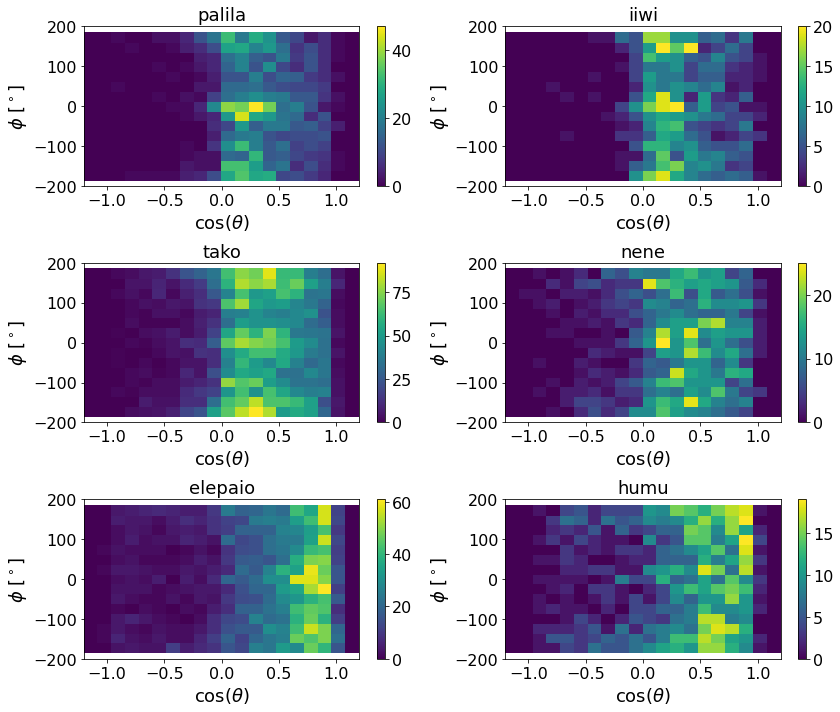

In [26]:
import matplotlib
def plot_theta_phi_paper():
    tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
    i = 1
    fig = plt.figure(figsize=(12,10))
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=18)
    for tpc in tpcs:
        #plt.subplot(6,3,i)
        #plt.hist2d(np.cos(LER_cont_inj[tpc]['theta']*np.pi/180), LER_cont_inj[tpc]['phi'], bins = (20,15), range = ((-1.2,1.2), (-185,185)), label = 'LER_cont_inj', norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        #plt.title(tpc+' LER_cont_inj')
        #plt.xlabel(r'cos($\theta$)')
        #plt.ylabel(r'$\phi$ [$^\circ$]')
        #plt.ylim(-200,200)
        plt.subplot(3,2,i)
        plt.hist2d(np.cos(Lumi_cont_inj[tpc]['theta']*np.pi/180), Lumi_cont_inj[tpc]['phi'], bins = (20,15), range = ((-1.2,1.2), (-185,185)), label = 'Lumi_cont_inj')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        plt.title(tpc)
        plt.xlabel(r'cos($\theta$)')
        plt.ylabel(r'$\phi$ [$^\circ$]')
        plt.ylim(-200,200)
        plt.colorbar()
        i+=1
    plt.tight_layout()
    plt.savefig("ang_dist.png")
    plt.show()
plot_theta_phi_paper()